Importamos Librerías

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

Obtenemos la data y lo convertimos en formato DataFrame de Pandas

In [2]:
iris = datasets.load_iris()
data = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

In [3]:
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


Visualizamos la data con el pairplot de Seaborn

/home/jesus/Ulima/VIII-Ciclo/Machine-learning/.venv/lib/python3.10/site-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


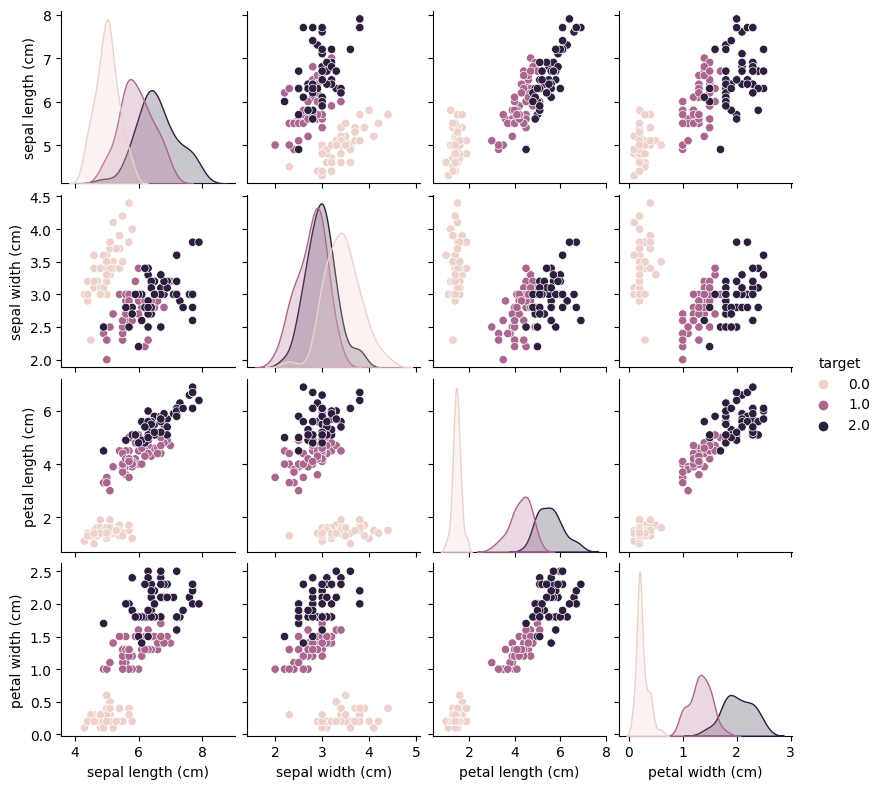

In [4]:
import seaborn as sns
sns.pairplot(data,hue='target',size=2)

Separamos X de Y

In [5]:
x = data.iloc[:,:4]
y = data.iloc[:,-1]

In [6]:
from sklearn.mixture import GaussianMixture

Indicamos al GMM que nos genere 3 clusters

In [7]:
gmm = GaussianMixture(n_components=3)
gmm.fit(x)

GaussianMixture(n_components=3)

Obtenemos el elemento prototipo (la media) de cada cluster

In [8]:
gmm.means_

array([[5.9170732 , 2.77804839, 4.20540364, 1.29848217],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.54639415, 2.94946365, 5.48364578, 1.98726565]])

Obtenemos la covarianza de cada cluster. Nos indica la "forma" que tiene.

In [9]:
gmm.covariances_

array([[[0.2755171 , 0.09662295, 0.18547072, 0.05478901],
        [0.09662295, 0.09255152, 0.09103431, 0.04299899],
        [0.18547072, 0.09103431, 0.20235849, 0.06171383],
        [0.05478901, 0.04299899, 0.06171383, 0.03233775]],

       [[0.121765  , 0.097232  , 0.016028  , 0.010124  ],
        [0.097232  , 0.140817  , 0.011464  , 0.009112  ],
        [0.016028  , 0.011464  , 0.029557  , 0.005948  ],
        [0.010124  , 0.009112  , 0.005948  , 0.010885  ]],

       [[0.38744093, 0.09223276, 0.30244302, 0.06087397],
        [0.09223276, 0.11040914, 0.08385112, 0.05574334],
        [0.30244302, 0.08385112, 0.32589574, 0.07276776],
        [0.06087397, 0.05574334, 0.07276776, 0.08484505]]])

Al predecir, el modelo calcula la probabilidad de que un punto de datos pertenezca a cada cluster y muestra el cluster que tenga la mayor probabilidad.

In [10]:
gmm.predict(x)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

También se puede mostrar las probabilidades que pertenezca a cada cluster. Los valores estarán entre 0 y 1.

In [11]:
gmm.predict_proba(x)

array([[1.01178227e-043, 1.00000000e+000, 6.06216336e-035],
       [9.23008233e-031, 1.00000000e+000, 2.47801094e-028],
       [1.02746863e-035, 1.00000000e+000, 4.01248422e-030],
       [1.59307037e-031, 1.00000000e+000, 2.59713998e-026],
       [3.78557282e-046, 1.00000000e+000, 2.54371410e-035],
       [9.46330650e-045, 1.00000000e+000, 3.19483943e-035],
       [9.44216654e-036, 1.00000000e+000, 5.98696069e-029],
       [6.54499083e-040, 1.00000000e+000, 5.93538905e-032],
       [2.31571000e-027, 1.00000000e+000, 2.62518847e-024],
       [2.17539007e-035, 1.00000000e+000, 8.99167536e-029],
       [4.20168837e-049, 1.00000000e+000, 5.84543182e-038],
       [2.07107653e-038, 1.00000000e+000, 2.89424930e-029],
       [1.29857342e-033, 1.00000000e+000, 1.97557310e-028],
       [5.05971616e-034, 1.00000000e+000, 7.02509209e-028],
       [5.01121316e-062, 1.00000000e+000, 3.64551699e-048],
       [2.99385146e-063, 1.00000000e+000, 1.35254996e-046],
       [4.74581227e-049, 1.00000000e+000